This is the code for the paper: https://arxiv.org/abs/2009.01047 

Sentimental LIAR: Extended Corpus and Deep Learning Models for Fake Claim Classification

The code is for the best performing model where the TEXT is passed into BERT-base and the output of the BERT-base is concatenated with EMO, SPC and SEN and then passed to the CNN. The model achieved the accuracy of 70% and F1 Macro Score of 0.6430



In [ ]:
!pip install -q transformers

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/My Drive/Bibek/LIAR-DATASET ORIGINAL/final/train_final-02.csv")
df_test=pd.read_csv("/content/drive/My Drive/Bibek/LIAR-DATASET ORIGINAL/final/test_final.csv")
df_valid=pd.read_csv("/content/drive/My Drive/Bibek/LIAR-DATASET ORIGINAL/final/valid_final.csv")
print("before truncating size of data is :", df.shape, df_test.shape,df_valid.shape)
df=df[:10232]
df_test=df_test[:1264]
df_valid=df_valid[:1280]
print("size of data is :", df.shape, df_test.shape, df_valid.shape)


#check if any null values are present
print("Any null in Subject? ",df['subject'].isnull().values.any())
print("Any null in Speaker? ",df['speaker'].isnull().values.any())
print("Any null in speaker_job? ",df['speaker_job'].isnull().values.any())
print("Any null in Party? ",df['party_affiliation'].isnull().values.any())
print("Any null in Context? ",df['context'].isnull().values.any())


before truncating size of data is : (10236, 31) (1267, 30) (1283, 31)
size of data is : (10232, 31) (1264, 30) (1280, 31)
Any null in Subject?  False
Any null in Speaker?  False
Any null in speaker_job?  True
Any null in Party?  False
Any null in Context?  True


In [ ]:
df['comment_text']=""
df_test['comment_text']=""
df_valid["comment_text"]=""

#combine all the columns into one for train, test and valid data

df['comment_text']=df['subject'].astype(str)+ ". "+ df["statement"]+\
df['speaker_id'].astype(str)+". "+df['speaker_job'].astype(str)+". "+ df['party_affiliation'].astype(str)\
+". "+df['context'].astype(str)+". "+df['sentiment_code'].astype(str)


df_test['comment_text']=df_test['subject'].astype(str)+ ". "+ df_test["statement"]+". "+\
df_test['speaker_id'].astype(str)+". "+df_test['speaker_job'].astype(str)+". "+ df_test['party_affiliation'].astype(str)\
+". "+df_test['context'].astype(str)+". "+df['sentiment_code'].astype(str)

df_valid['comment_text']=df_valid['subject'].astype(str)+ ". "+ df_valid["statement"]+\
df_valid['speaker_id'].astype(str)+". "+df_valid['speaker_job'].astype(str)+". "+ df_valid['party_affiliation'].astype(str)\
+". "+df_valid['context'].astype(str)+". "+df_valid['sentiment_code'].astype(str)


In [ ]:
#concatenate emotion, speakers' credit and sentiment score togehter
df['emotion']="["+df['anger'].astype(str)+","+df['disgust'].astype(str)+","\
+df['fear'].astype(str)+","+df['joy'].astype(str)+","+df['sad'].astype(str)+","+\
df["barely_true_counts"].astype(str) +","+ df["false_counts"].astype(str)  +","+\
df["half_true_counts"].astype(str) + ","+df["mostly_true_counts"].astype(str) +","+ \
df["pants_on_fire_counts"].astype(str)+","+df["sentiment_score"].astype(str)+"]"


df_test['emotion']="["+df_test['anger'].astype(str)+","+df_test['disgust'].astype(str)+","\
+df_test['fear'].astype(str)+","+df_test['joy'].astype(str)+","+df_test['sad'].astype(str)\
+ ","+df_test["barely_true_counts"].astype(str) + ","+ df_test["false_counts"].astype(str) \
+","+ df_test["half_true_counts"].astype(str) +","+ df_test["mostly_true_counts"].astype(str)\
+","+ df_test["pants_on_fire_counts"].astype(str)+","+df_test["sentiment_score"].astype(str)+"]"


df_valid['emotion']="["+df_valid['anger'].astype(str)+","+df_valid['disgust'].astype(str)+","\
+df_valid['fear'].astype(str)+","+df_valid['joy'].astype(str)+","+df_valid['sad'].astype(str)\
+ ","+df_valid["barely_true_counts"].astype(str) + ","+ df_valid["false_counts"].astype(str) \
+","+ df_valid["half_true_counts"].astype(str) +","+ df_valid["mostly_true_counts"].astype(str)\
+","+ df_valid["pants_on_fire_counts"].astype(str)+","+df_valid["sentiment_score"].astype(str)+"]"



In [ ]:
#target should be converted from string to the list
import ast
def convert_to_list(text):
  return ast.literal_eval(text)

In [ ]:
for i in range(len(df["emotion"])):
  try:
    df["emotion"][i]=convert_to_list(df["emotion"][i])
  except:
    print(i,"====",df["emotion"][1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
for i in range(len(df_test["emotion"])):
  try:
    df_test["emotion"][i]=convert_to_list(df_test["emotion"][i])
  except:
    print(i,"====",df_test["emotion"][i], type(df_test["emotion"][i]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
for i in range(len(df_valid["emotion"])):
  try:
    df_valid["emotion"][i]=convert_to_list(df_valid["emotion"][i])
  except:
    print(i,"====",df_valid["emotion"][i], type(df_valid["emotion"][i]))    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df['list']=df['list'].apply(convert_to_list)
df_test['list']=df_test['list'].apply(convert_to_list)
df_valid['list']=df_valid['list'].apply(convert_to_list)

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertModel, BertConfig

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

MAX_LEN = 300
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 8
EPOCHS = 1
LEARNING_RATE = 1e-05
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class CustomDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.comment_text = dataframe.comment_text
        self.targets = self.data.list
        self.max_len = max_len
        #Add emotion list from dataframe
        self.emotion=dataframe.emotion
        self.dfID=dataframe.ID

    def __len__(self):
        return len(self.comment_text)

    def __getitem__(self, index):
        comment_text = str(self.comment_text[index])
        comment_text = " ".join(comment_text.split())

        inputs = self.tokenizer.encode_plus(
            comment_text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True,
            truncation=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float),
            'emotion':torch.tensor(self.emotion[index], dtype=torch.float),
            'dfID':self.dfID[index]
        }




In [ ]:
# Creating the dataset and dataloader for the neural network

train_size = 1
train_dataset=df.sample(frac=train_size,random_state=200).reset_index(drop=True)
test_dataset=df_test.sample(frac=train_size,random_state=200).reset_index(drop=True)
valid_dataset=df_valid.sample(frac=1,random_state=200).reset_index(drop=True)


print("FULL Dataset: {}".format(df.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("TEST Dataset: {}".format(test_dataset.shape))
print("VALID Dataset: {}".format(valid_dataset.shape))

training_set = CustomDataset(train_dataset, tokenizer, MAX_LEN)
testing_set = CustomDataset(test_dataset, tokenizer, MAX_LEN)
valid_set= CustomDataset(valid_dataset, tokenizer, MAX_LEN)
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': 8,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)
valid_loader=DataLoader(valid_set,**test_params)

FULL Dataset: (10232, 33)
TRAIN Dataset: (10232, 33)
TEST Dataset: (1264, 32)
VALID Dataset: (1280, 33)


In [ ]:
# Creating the customized model, by adding a drop out and a dense layer on top of BERT-base to get the final output for the model. 
from torch import nn

class BERT_cnn_Class(torch.nn.Module):
    def __init__(self):
        super(BERT_cnn_Class, self).__init__()
        self.l1 = transformers.BertModel.from_pretrained('bert-base-uncased')
        self.l2 = torch.nn.Dropout(0.3)
        
        self.l3=torch.nn.Conv1d(1, 50, kernel_size=20,stride=1)
        self.l4=torch.nn.Conv1d(50,100, kernel_size=20, stride=1)
        self.max_pooling=nn.MaxPool1d(2)
        self.l5=torch.nn.Linear(18000, 768)
        self.l6 = torch.nn.Linear(768, 2)
    
    def forward(self, ids, mask, token_type_ids,emotion):
        _, output_1= self.l1(ids, attention_mask = mask, token_type_ids = token_type_ids)
        output_2 = self.l2(output_1) #output from bert
        #feed into conv net
        #first change the size to [8,1,768]        
        output_2=torch.cat((emotion,output_2),1) # concat the output of BERT with EMO+SPC+SEN
        output_2=output_2.unsqueeze(1)        
        output_3=self.l3(output_2)        
        output_3= self.max_pooling(output_3)
        output_4=self.l4(output_3)        
        output_4=self.max_pooling(output_4)
        #change the shape to fit into linear function
        output_4=output_4.view(8,-1)
        output_5=self.l5(output_4)
        output_6=self.l6(output_5)        
        return output_6

model = BERT_cnn_Class()

In [ ]:
model.to(device)

In [ ]:
import time
import datetime
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))    
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [ ]:
#TRAIN THE MODEL
val_losses=[]
train_losses=[]
accuracy_list=[]

for epoch in range(2):
  t0 = time.time()
  model.train()
  print(f"\t Epoch: {epoch}  is Started: ")
  batch=0
  train_loss=0
  
  for _,data in enumerate(training_loader, 0):
      try:
          ids = data['ids'].to(device, dtype = torch.long)
          mask = data['mask'].to(device, dtype = torch.long)
          token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
          targets = data['targets'].to(device, dtype = torch.float)
          emotions=data['emotion'].to(device,dtype=torch.float)
      except:
          print(f"some error at testing {batch}")
          print(data['dfID'] )
      try:  
        outputs = model(ids, mask, token_type_ids,emotions)
        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        train_loss+=loss.item()
        #print(f'{count} Loss:  {loss.item()}')
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch+=1
      except EOFError:
        print(f"{data['dfID']} error because of batch size-------->", EOFError)
        print(f"some error at testing {batch}")
        print(data['dfID'] )
  print(f"   Epoch: {epoch} Train loss is :{train_loss/batch}") 
  train_loss /=batch
  train_losses.append(train_loss)    
  print(f"   Epoch {epoch} took: {format_time(time.time() - t0)} \n")

  model.eval()
  fin_targets=[]
  fin_outputs=[]
  with torch.no_grad():
      val_loss, batch = 0, 1
      for _, data in enumerate(testing_loader, 0):
          ids = data['ids'].to(device, dtype = torch.long)
          mask = data['mask'].to(device, dtype = torch.long)
          token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
          targets = data['targets'].to(device, dtype = torch.float)
          emotions=data['emotion'].to(device,dtype=torch.float)
          batch+=1
          try:
                        outputs = model(ids, mask, token_type_ids,emotions)
                        loss = loss_fn(outputs, targets)
                        val_loss+=loss.item()
                        fin_targets.extend(targets.cpu().detach().numpy().tolist())
                        fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
          except:
            print(f"some error at testing {batch}")
            print(data['dfID'] )

      val_loss/=batch
      val_losses.append(val_loss)
  outputs=fin_outputs
  outputs = np.array(outputs) >= 0.5
  targets=fin_targets
  accuracy = metrics.accuracy_score(targets, outputs)
  accuracy_list.append(accuracy)
  f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
  f1_score_macro = metrics.f1_score(targets, outputs, average='macro')
  print(f"Epoch: {epoch} - Accuracy on Testing Data Score = {accuracy}")
  print(f"Epoch: {epoch} - F1 Score on Testing Data (Micro) = {f1_score_micro}")
  print(f"Epoch: {epoch} - F1 Score on Testing Data (Macro) = {f1_score_macro}")
  print(f"\n \t Epoch {epoch} : Train Loss (Training Data):{train_loss}, Validation Loss (Testing Data): {val_loss}")
  print("_________________________________________________\n")
  #if train_loss > val_loss:
  # torch.save(model.state_dict(), "/content/drive/My Drive/Bibek/models_saved/w9p7")
  

	 Epoch: 0  is Started: 
   Epoch: 0 Train loss is :0.6337657139998474
   Epoch 0 took: 0:06:17 

Epoch: 0 - Accuracy on Testing Data Score = 0.6693037974683544
Epoch: 0 - F1 Score on Testing Data (Micro) = 0.6708860759493671
Epoch: 0 - F1 Score on Testing Data (Macro) = 0.6011597099211216

 	 Epoch 0 : Train Loss (Training Data):0.6337657139998474, Validation Loss (Testing Data): 0.5962660192693554
_________________________________________________

	 Epoch: 1  is Started: 
   Epoch: 1 Train loss is :0.5931087791849804
   Epoch 1 took: 0:06:16 

Epoch: 1 - Accuracy on Testing Data Score = 0.6914556962025317
Epoch: 1 - F1 Score on Testing Data (Micro) = 0.6958579881656805
Epoch: 1 - F1 Score on Testing Data (Macro) = 0.6538011695906432

 	 Epoch 1 : Train Loss (Training Data):0.5931087791849804, Validation Loss (Testing Data): 0.5924532325387751
_________________________________________________



In [ ]:
from pandas import DataFrame
df=DataFrame(train_losses,columns=['train_losses'])
df=DataFrame(val_losses,columns=['val_losses'])
df.to_csv("/content/drive/My Drive/Bibek/Results/w10_p4.csv")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


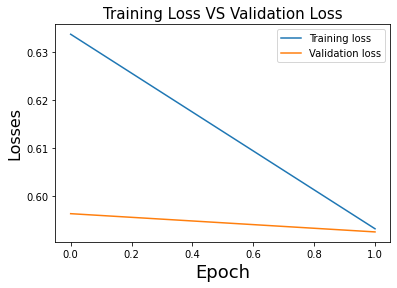

In [ ]:


import matplotlib.pyplot as plt
plt.plot(train_losses, label="Training loss")
plt.plot(val_losses, label="Validation loss")

plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Losses', fontsize=16)
plt.title('Training Loss VS Validation Loss', fontsize=15)

plt.legend()
plt.savefig('/content/drive/My Drive/Bibek/Results/w10_p4-epoch1.eps')

#plt.title("Losses")

In [ ]:
#Test on validation data
model.eval()
fin_targets=[]
fin_outputs=[]
with torch.no_grad():
    c=0
    for _, data in enumerate(valid_loader, 0):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)
        emotions=data['emotion'].to(device,dtype=torch.float)
        c+=1
        try:
                      outputs = model(ids, mask, token_type_ids,emotions)
                      fin_targets.extend(targets.cpu().detach().numpy().tolist())
                      fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
        except EOFError:
          print(f"some error at {c}",EOFError)
outputs=fin_outputs
outputs = np.array(outputs) >= 0.5
targets=fin_targets
accuracy = metrics.accuracy_score(targets, outputs)

f1_score_macro = metrics.f1_score(targets, outputs, average='macro')
print(f"Epoch:  {epoch}, Accuracy Score on validation data = {accuracy}")

print(f"Epoch:  {epoch}, F1 Score on Validation Data (Macro) = {f1_score_macro}") 
print("____________________________________________________________\n________________________________________________________________\n\n")

Epoch:  1, Accuracy Score on validation data = 0.69921875
Epoch:  1, F1 Score on Validation Data (Macro) = 0.6430236972753443
____________________________________________________________
________________________________________________________________


